In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ft
%matplotlib inline

In [2]:
path = r"C:\Users\Akash Dawari\INeuron\MyNeuron Projects\OlympicAnalysis\Data"
athlete_events_df = pd.read_csv(os.path.join(path,"athlete_events.csv"))
noc_regions_df = pd.read_csv(os.path.join(path,'noc_regions.csv'))

In [3]:
athlete_events_df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [4]:
noc_regions_df.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [5]:
athlete_events_df.describe(include='all')

ID                  Name     Sex            Age  \
count   271116.000000                271116  271116  261642.000000   
unique            NaN                134732       2            NaN   
top               NaN  Robert Tait McKenzie       M            NaN   
freq              NaN                    58  196594            NaN   
mean     68248.954396                   NaN     NaN      25.556898   
std      39022.286345                   NaN     NaN       6.393561   
min          1.000000                   NaN     NaN      10.000000   
25%      34643.000000                   NaN     NaN      21.000000   
50%      68205.000000                   NaN     NaN      24.000000   
75%     102097.250000                   NaN     NaN      28.000000   
max     135571.000000                   NaN     NaN      97.000000   

               Height         Weight           Team     NOC        Games  \
count   210945.000000  208241.000000         271116  271116       271116   
unique            NaN            NaN           1184     230           51   
top               NaN            NaN  United States     USA  2000 Summer   
freq              NaN            NaN          17847   18853        13821   
mean       175.338970      70.702393            NaN     NaN          NaN   
std         10.518462      14.348020            NaN     NaN          NaN   
min        127.000000      25.000000            NaN     NaN          NaN   
25%        168.000000      60.000000            NaN     NaN          NaN   
50%        175.000000      70.000000            NaN     NaN          NaN   
75%        183.000000      79.000000            NaN     NaN          NaN   
max        226.000000     214.000000            NaN     NaN          NaN   

                 Year  Season    City      Sport                    Event  \
count   271116.000000  271116  271116     271116                   271116   
unique            NaN       2      42         66                      765   
top               NaN  Summer  London  Athletics  Football Men's Football   
freq              NaN  222552   22426      38624                     5733   
mean      1978.378480     NaN     NaN        NaN                      NaN   
std         29.877632     NaN     NaN        NaN                      NaN   
min       1896.000000     NaN     NaN        NaN                      NaN   
25%       1960.000000     NaN     NaN        NaN                      NaN   
50%       1988.000000     NaN     NaN        NaN                      NaN   
75%       2002.000000     NaN     NaN        NaN                      NaN   
max       2016.000000     NaN     NaN        NaN                      NaN   

        Medal  
count   39783  
unique      3  
top      Gold  
freq    13372  
mean      NaN  
std       NaN  
min       NaN  
25%       NaN  
50%       NaN  
75%       NaN  
max       NaN

In [6]:
noc_regions_df.describe()

NOC   region                 notes
count   230      227                    21
unique  230      206                    21
top     AFG  Germany  Netherlands Antilles
freq      1        4                     1

In [7]:
athlete_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
noc_regions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


# Working for Summer Olympic

In [9]:
summer_athlete_df = athlete_events_df[athlete_events_df['Season']=='Summer']

In [10]:
summer_athlete_df.head()

ID                                Name Sex   Age  Height  Weight  \
0    1                           A Dijiang   M  24.0   180.0    80.0   
1    2                            A Lamusi   M  23.0   170.0    60.0   
2    3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3    4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

              Team  NOC        Games  Year  Season         City       Sport  \
0            China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1            China  CHN  2012 Summer  2012  Summer       London        Judo   
2          Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3   Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
26     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                           Event Medal  
0    Basketball Men's Basketball   NaN  
1   Judo Men's Extra-Lightweight   NaN  
2        Football Men's Football   NaN  
3    Tug-Of-War Men's Tug-Of-War  Gold  
26  Athletics Women's 100 metres   NaN

In [11]:
summer_athlete_df.shape

(222552, 15)

In [12]:
summer_athlete_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
dtype: int64

In [13]:
summer_athlete_df.duplicated().sum()

1385

In [14]:
# Now to remove duplicated rows
summer_athlete_df.drop_duplicates(inplace=True)

In [15]:
summer_athlete_df = summer_athlete_df.merge(noc_regions_df, on='NOC', how='left')

### Now to calculate medals 

In [16]:
# medal column is categorial column
summer_athlete_df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [17]:
# convert the medal column into dummy columns 
pd.get_dummies(summer_athlete_df['Medal'])

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
221162       0     0       0
221163       0     0       0
221164       0     0       0
221165       0     0       0
221166       0     0       0

[221167 rows x 3 columns]

In [18]:
summer_athlete_df = pd.concat([summer_athlete_df, pd.get_dummies(summer_athlete_df['Medal'])], axis=1)

In [19]:
medal_df = summer_athlete_df.groupby(by='region').sum()[['Gold', 'Bronze', 'Silver']]
medal_df

Gold  Bronze  Silver
region                                       
Afghanistan               0.0     2.0     0.0
Albania                   0.0     0.0     0.0
Algeria                   5.0     8.0     4.0
American Samoa            0.0     0.0     0.0
Andorra                   0.0     0.0     0.0
...                       ...     ...     ...
Virgin Islands, British   0.0     0.0     0.0
Virgin Islands, US        0.0     0.0     1.0
Yemen                     0.0     0.0     0.0
Zambia                    0.0     1.0     1.0
Zimbabwe                 17.0     1.0     4.0

[205 rows x 3 columns]

In [20]:
medal_df.sort_values('Gold', ascending=False)

Gold  Bronze  Silver
region                               
USA            2472.0  1197.0  1333.0
Russia         1220.0   994.0   974.0
Germany        1075.0  1064.0   987.0
UK              635.0   620.0   729.0
Italy           518.0   454.0   474.0
...               ...     ...     ...
Lesotho           0.0     0.0     0.0
Albania           0.0     0.0     0.0
Libya             0.0     0.0     0.0
Liechtenstein     0.0     0.0     0.0
Liberia           0.0     0.0     0.0

[205 rows x 3 columns]

But the above table is wrong cause it also including medals of teams games where every member of the team won medal but we have to count the medals for the game not for the player in the game.

In [21]:
medal_df = summer_athlete_df.drop_duplicates(['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
medal_df.shape

(105636, 20)

In [22]:
medal_tally = medal_df.groupby(by='region').sum()[['Gold', 'Bronze', 'Silver']].sort_values('Gold', ascending=False).reset_index()
medal_tally['Total Medals'] = medal_tally['Gold'] + medal_tally['Bronze'] + medal_tally['Silver']
medal_tally

region    Gold  Bronze  Silver  Total Medals
0              USA  1035.0   708.0   802.0        2545.0
1           Russia   592.0   487.0   498.0        1577.0
2          Germany   444.0   491.0   457.0        1392.0
3               UK   278.0   300.0   317.0         895.0
4           France   234.0   287.0   256.0         777.0
..             ...     ...     ...     ...           ...
200        Lesotho     0.0     0.0     0.0           0.0
201        Albania     0.0     0.0     0.0           0.0
202          Libya     0.0     0.0     0.0           0.0
203  Liechtenstein     0.0     0.0     0.0           0.0
204        Liberia     0.0     0.0     0.0           0.0

[205 rows x 5 columns]

In [23]:
years = sorted(summer_athlete_df['Year'].unique().tolist())
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [24]:
countries = sorted((summer_athlete_df['region'].dropna().unique().tolist()))
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [25]:
def fetch_medal_tally(df, yr,cou):
    
    flag=0
    if yr == "Overall" and cou == "Overall":
        temp_df = df
    elif yr != "Overall" and cou == 'Overall':
        flag=1
        temp_df = df[df['Year'] == yr]
    elif yr == "Overall" and cou != 'Overall':
        temp_df = df[df['region'] == cou]
    else:
        temp_df = df[(df['region'] == cou) & (df['Year'] == yr)]
    
    medal_df = temp_df.drop_duplicates(['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    if flag==1:
        medal_tally = medal_df.groupby(by='Year').sum()[['Gold', 'Bronze', 'Silver']].sort_values('Year', ascending=False).reset_index()
    else:
        medal_tally = medal_df.groupby(by='region').sum()[['Gold', 'Bronze', 'Silver']].sort_values('Gold', ascending=False).reset_index()
    medal_tally['Total Medals'] = medal_tally['Gold'] + medal_tally['Bronze'] + medal_tally['Silver']
    return medal_tally

In [26]:
fetch_medal_tally(summer_athlete_df,2016, 'USA')

region  Gold  Bronze  Silver  Total Medals
0    USA    46      38      37           121

# Overall 

In [27]:
# No. of times olympic held
summer_athlete_df.Year.unique().shape[0] -1

28

In [28]:
# No. of city hosted olympic 
summer_athlete_df.City.unique().shape[0]

23

In [29]:
# No. of sport played in olympic 
summer_athlete_df.Sport.unique().shape[0]

52

In [30]:
# No. of events held in olympic 
summer_athlete_df.Event.unique().shape[0]

651

In [31]:
# No. of nation participated in olympic 
summer_athlete_df.region.unique().shape[0]

206

In [32]:
# No. of atheletes participated in olympic 
summer_athlete_df.Name.unique().shape[0]

116122

In [62]:
df = summer_athlete_df

Participating countries over the years

In [34]:
x = sorted(df['Year'].unique().tolist())
y = [df[df['Year']==i]['region'].unique().shape[0] for i in x]

In [35]:
fig = px.line(x=x,y=y,labels={'x':"Year", 'y':"Nations participated"})
fig.show()

Number of events over the years

In [36]:
x = sorted(df['Year'].unique().tolist())
y = [df[df['Year']==i]['Event'].unique().shape[0] for i in x]

In [37]:
fig = px.line(x=x,y=y,labels={'x':"Year", 'y':"Nations participated"})
fig.show()

Number of athletes participated over years

In [38]:
x = sorted(df['Year'].unique().tolist())
y = [df[df['Year']==i]['Name'].unique().shape[0] for i in x]

In [39]:
fig = px.line(x=x,y=y,labels={'x':"Year", 'y':"Athletes participated"})
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

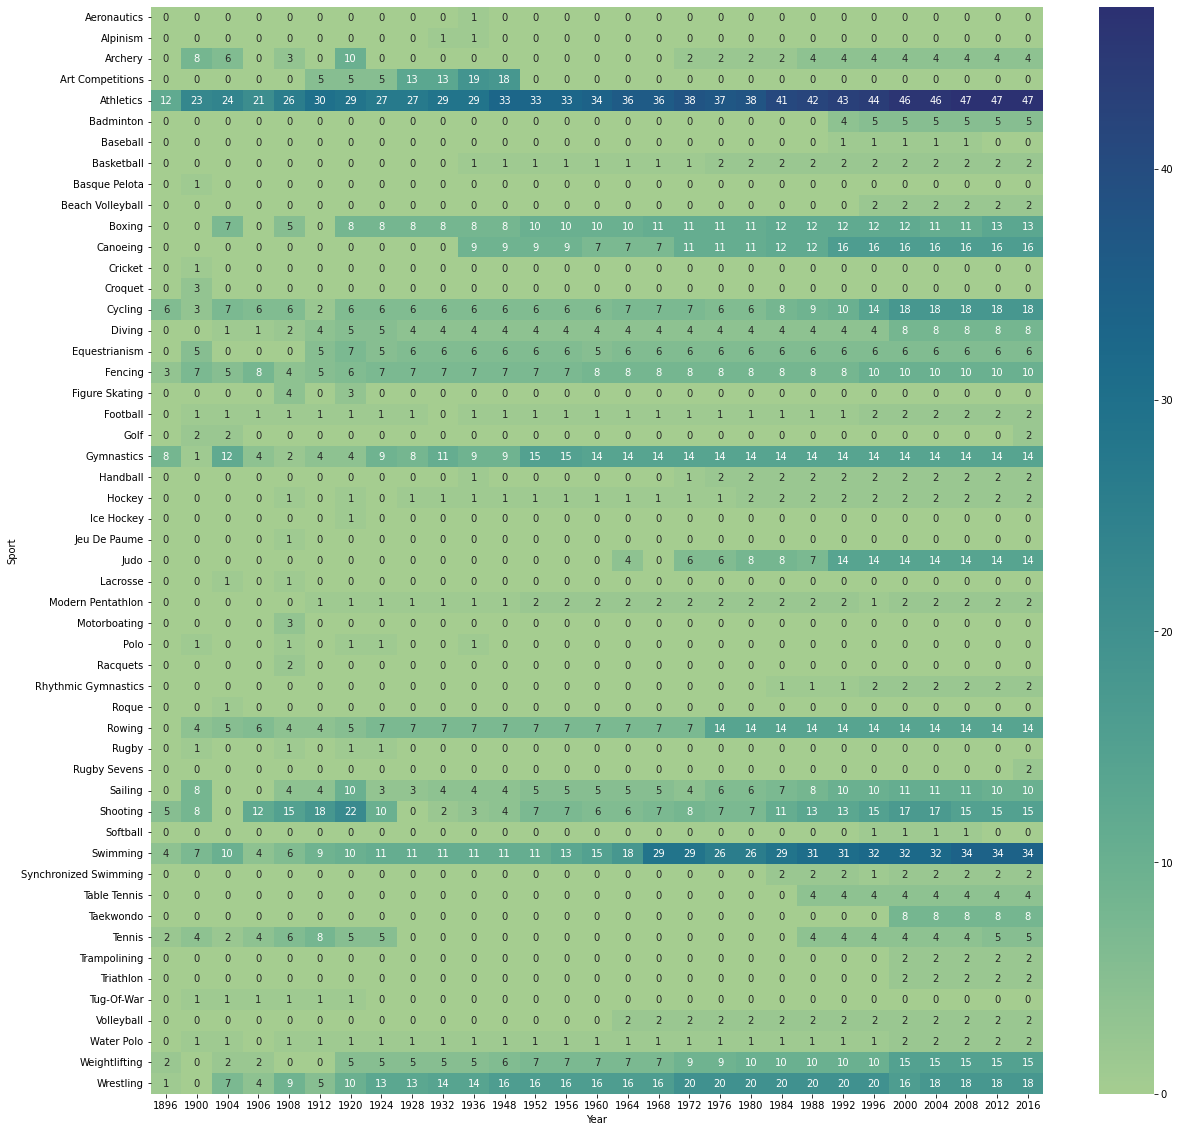

In [63]:
x = df.drop_duplicates(['Year','Sport','Event'])
plt.figure(figsize=(20,20))
sb.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'), annot=True, cmap='crest')

In [73]:
px.imshow(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'), 
          text_auto=True, aspect="auto",  color_continuous_scale='RdBu_r', origin='lower')

In [41]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [42]:
kt = df.dropna(subset=['Medal'])['Name'].value_counts().reset_index()
pd.merge(kt,df, left_on='index', right_on='Name', how='left')[['index', 'region','Sport','Name_x']]

index   region     Sport  Name_x
0      Michael Fred Phelps, II      USA  Swimming      28
1      Michael Fred Phelps, II      USA  Swimming      28
2      Michael Fred Phelps, II      USA  Swimming      28
3      Michael Fred Phelps, II      USA  Swimming      28
4      Michael Fred Phelps, II      USA  Swimming      28
...                        ...      ...       ...     ...
63088          Preben Isaksson  Denmark   Cycling       1
63089          Preben Isaksson  Denmark   Cycling       1
63090              rpd Lengyel  Hungary  Swimming       1
63091              rpd Lengyel  Hungary  Swimming       1
63092              rpd Lengyel  Hungary  Swimming       1

[63093 rows x 4 columns]

In [43]:
def most_achivers(df, sports):
    temp_df = df.dropna(subset=['Medal'])
    
    if sports != 'Overall':
        temp_df = temp_df[temp_df['Sport']==sports]
    
    kt = temp_df['Name'].value_counts().reset_index().merge(df, left_on='index', right_on='Name', how='left')[['index','region','Sport','Name_x']].drop_duplicates()
    kt.rename(columns={'Name_x':'Tota Medals','index':'Name' }, inplace=True)
    return kt

In [44]:
most_achivers(df,'Overall')

Name   region          Sport  Tota Medals
0                 Michael Fred Phelps, II      USA       Swimming           28
30     Larysa Semenivna Latynina (Diriy-)   Russia     Gymnastics           18
49           Nikolay Yefimovich Andrianov   Russia     Gymnastics           15
73            Borys Anfiyanovych Shakhlin   Russia     Gymnastics           13
97                            Takashi Ono    Japan     Gymnastics           13
...                                   ...      ...            ...          ...
63079                  Joel Isasi Gonzlez     Cuba      Athletics            1
63081             Florena Andreea Isrescu  Romania     Gymnastics            1
63085                        Ryoji Isaoka    Japan  Weightlifting            1
63088                     Preben Isaksson  Denmark        Cycling            1
63090                         rpd Lengyel  Hungary       Swimming            1

[25352 rows x 4 columns]

# Country wise 

1. country medal tally per year (line Plot)

In [45]:
temp_df = df.dropna(subset=['Medal']).drop_duplicates(['Team','Year', 'region', 'Team', 'Games', 'Event'])
temp_df = temp_df[temp_df['region']=='USA']
temp_df = temp_df.groupby('Year').count()['Medal'].reset_index()

In [46]:
fig = px.line(temp_df, x='Year',y='Medal',labels={'x':"Year", 'y':"Medal"})
fig.show()

In [47]:
kt= df['region'].drop_duplicates().astype('str').tolist()
kt.sort()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

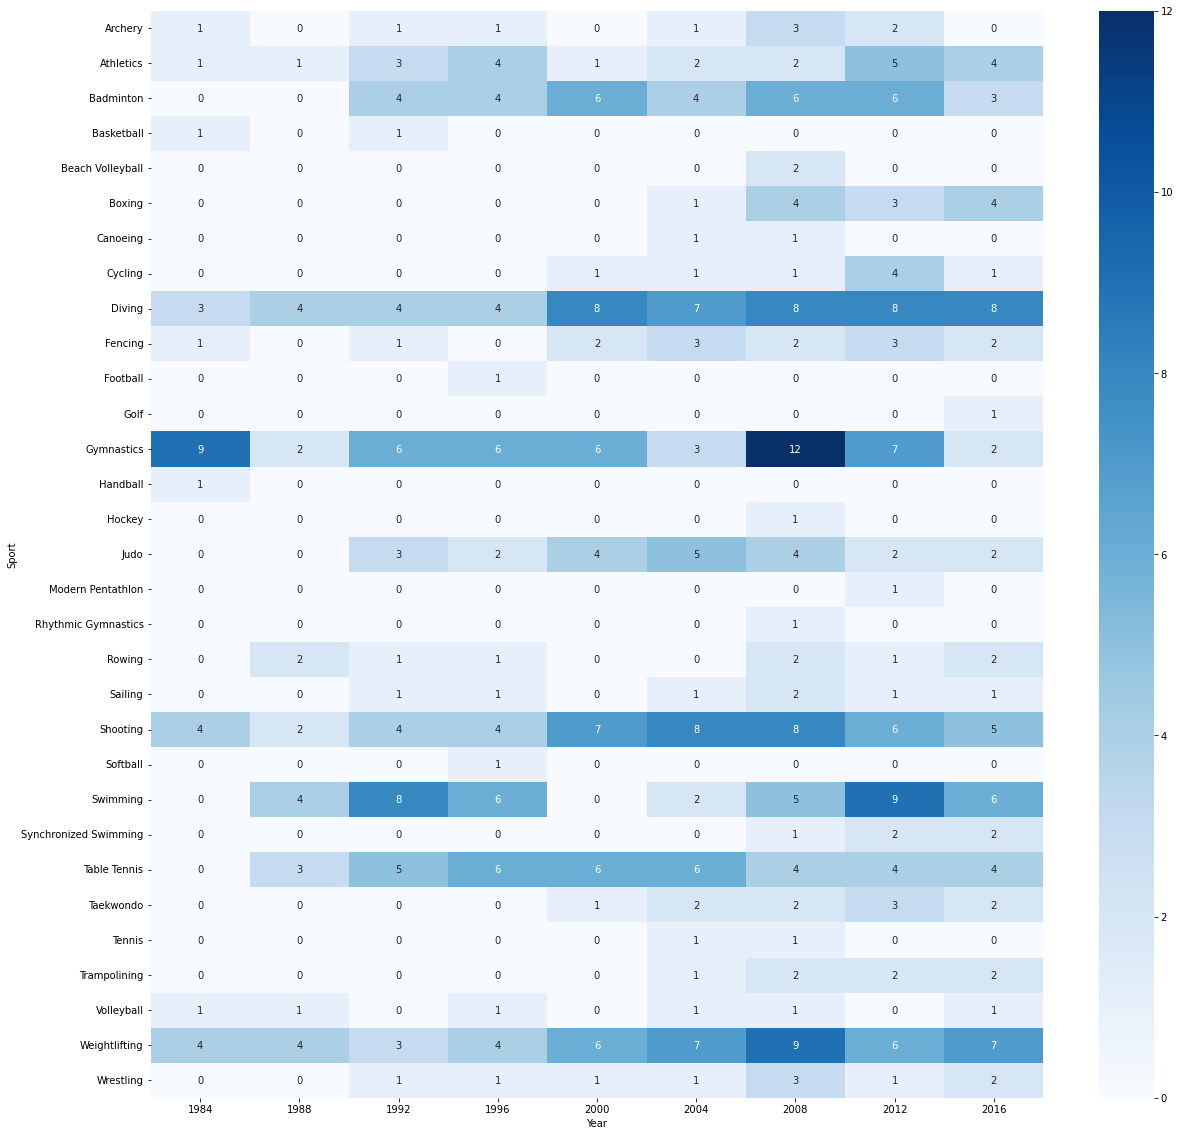

In [48]:
temp_df = df.dropna(subset=['Medal']).drop_duplicates(['Team','Year', 'region', 'Team', 'Games', 'Event'])
temp_df = temp_df[temp_df['region']=='China']
plt.figure(figsize=(20,20))
sb.heatmap(temp_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0), annot=True, cmap='Blues')

# Athletes wise analysis

In [49]:
temp_df = df.drop_duplicates(subset=['Name', 'Height', 'Weight', 'region'])

In [50]:
x1=temp_df['Age'].dropna()
x2=temp_df[temp_df['Gold']==1]['Age'].dropna()
x3=temp_df[temp_df['Silver']==1]['Age'].dropna()
x4=temp_df[temp_df['Bronze']==1]['Age'].dropna()

In [51]:
ft.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Age','Silver age', 'Bronze age'], show_hist=False,show_rug=False )


In [52]:
temp_df = df.drop_duplicates(subset=['Name', 'Height', 'Weight', 'region'])
sports = df['Sport'].unique().tolist()
lt=[]
name=[]
for i in sports:
    pre_df=temp_df[temp_df['Sport'] == i]
    x = pre_df[pre_df['Gold'] == 1]['Age'].dropna()
    if len(x)>2:
        lt.append(x)
        name.append(i)

ft.create_distplot(lt,name, show_hist=False,show_rug=False )


In [53]:
temp_df = df.drop_duplicates(subset=['Name', 'Height', 'Weight', 'region'])

C:\Users\Akash Dawari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Height', ylabel='Weight'>

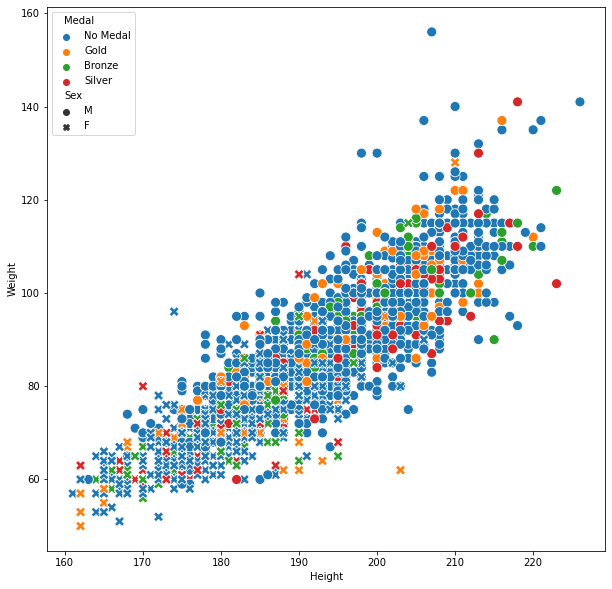

In [54]:
temp_df['Medal'].fillna('No Medal', inplace=True)
temp_df = temp_df[temp_df['Sport']=='Basketball']
plt.figure(figsize=(10,10))
sb.scatterplot(temp_df['Height'], temp_df['Weight'], hue=temp_df['Medal'], style=temp_df['Sex'], s=100)

In [55]:
temp_df = df.drop_duplicates(subset=['Name', 'Height', 'Weight', 'region', 'Year', 'Event'])

In [56]:
male = temp_df[temp_df['Sex']=='M'].groupby('Year').count()['Sex'].reset_index()
female = temp_df[temp_df['Sex']=='F'].groupby('Year').count()['Sex'].reset_index()
sex = pd.merge(male,female,how='left',on='Year').rename(columns={'Sex_x':'Male', 'Sex_y':'Female'}).fillna(0).astype('int')

In [57]:
fig = px.line(sex,x='Year', y=['Male','Female'], )
fig.show()

In [76]:
df = athlete_events_df[athlete_events_df['Season']=="Winter"]
df = df.merge(noc_regions_df, on='NOC', how='left')

In [59]:
temp_df = df.dropna(subset=['Medal']).drop_duplicates(['Team', 'Year', 'region', 'Team', 'Games', 'Event'])
# temp_df = temp_df[temp_df['region'] == "Albania"]

In [60]:
df[df['region']=='Albania']

ID          Name Sex   Age  Height  Weight     Team  NOC  \
27745   78179  Suela Mhilli   F  20.0   163.0    56.0  Albania  ALB   
27746   78179  Suela Mhilli   F  20.0   163.0    56.0  Albania  ALB   
43254  120779    Erjon Tola   M  19.0   180.0    74.0  Albania  ALB   
43255  120779    Erjon Tola   M  19.0   180.0    74.0  Albania  ALB   
43256  120779    Erjon Tola   M  19.0   180.0    74.0  Albania  ALB   
43257  120779    Erjon Tola   M  23.0   180.0    74.0  Albania  ALB   
43258  120779    Erjon Tola   M  23.0   180.0    74.0  Albania  ALB   

             Games  Year  Season       City          Sport  \
27745  2014 Winter  2014  Winter      Sochi  Alpine Skiing   
27746  2014 Winter  2014  Winter      Sochi  Alpine Skiing   
43254  2006 Winter  2006  Winter     Torino  Alpine Skiing   
43255  2006 Winter  2006  Winter     Torino  Alpine Skiing   
43256  2006 Winter  2006  Winter     Torino  Alpine Skiing   
43257  2010 Winter  2010  Winter  Vancouver  Alpine Skiing   
43258  2010 Winter  2010  Winter  Vancouver  Alpine Skiing   

                                    Event Medal   region notes  
27745  Alpine Skiing Women's Giant Slalom   NaN  Albania   NaN  
27746        Alpine Skiing Women's Slalom   NaN  Albania   NaN  
43254         Alpine Skiing Men's Super G   NaN  Albania   NaN  
43255    Alpine Skiing Men's Giant Slalom   NaN  Albania   NaN  
43256          Alpine Skiing Men's Slalom   NaN  Albania   NaN  
43257    Alpine Skiing Men's Giant Slalom   NaN  Albania   NaN  
43258          Alpine Skiing Men's Slalom   NaN  Albania   NaN

In [93]:
df.dropna(inplace=True)
fig = px.scatter(df, x='Height', y='Weight', color="Medal",
                             symbol="Sex",color_discrete_sequence=['lightskyblue','brown','silver', 'goldenrod' ],
                             symbol_sequence= ['circle', 'cross'], size=[100]*7)
fig.show()

In [1]:
from datetime import datetime

In [4]:
obj = datetime.now()

In [10]:
''.join(map(str,str(obj.date()).split('-')))

'20220428'

In [12]:
''.join(map(str,str(obj.time()).split(':')))

'162528.709390'